# Non-federated runs with convolutional neural networks

_21 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

The purpose of these plots is to figure out, in a non-federated setting, which models and optimizer parameters are sufficiently close to state-of-the-art to use for more ambitious experiments. This has all been done before, but doing it in this framework allows us to verify the code in this implementation, which doesn't necessarily reimplement everything in earlier such works.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, make_axes, show_timestamp_info

In [2]:
results_dir = Path("results/20210819-simple-cnns/")
show_timestamp_info(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **19 Aug 2021, 22:32:33** | 20 Aug 2021, 06:15:59 | 7 h 43 min 26 s |
| last to finish | 21 Aug 2021, 05:32:11 | **21 Aug 2021, 05:55:17** | 23 min 05 s |
| shortest | 20 Aug 2021, 08:23:02 | 20 Aug 2021, 08:43:14 | **20 min 11 s** |
| longest | 20 Aug 2021, 09:15:06 | 20 Aug 2021, 17:55:07 | **8 h 40 min 01 s** |


In [3]:
fixed_specs = {
    "epochs": 150,
}

# CIFAR-10

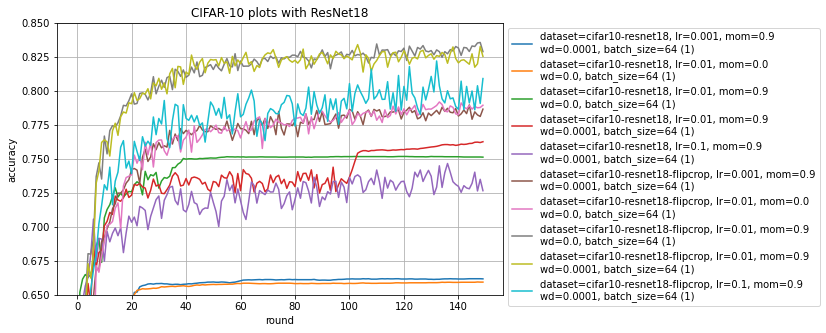

In [4]:
series_specs = {
    "dataset": [
        "cifar10-resnet18",
        "cifar10-resnet18-flipcrop",
    ],
    "learning_rate": '__all__',
    "momentum": '__all__',
    "weight_decay": '__all__',
    "batch_size": '__all__',
    "optimizer": '__missing__',
    "lr_scheduler": '__missing__',
}

plot_averaged_training_charts(results_dir, ['accuracy'], {}, fixed_specs, series_specs)
plt.title("CIFAR-10 plots with ResNet18")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim((0.65, 0.85))
plt.grid(True)

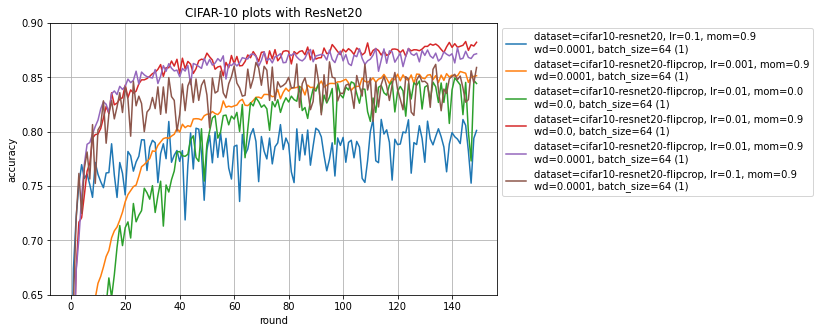

In [5]:
series_specs = {
    "dataset": [
        "cifar10-resnet20",
        "cifar10-resnet20-flipcrop",
    ],
    "learning_rate": '__all__',
    "momentum": '__all__',
    "weight_decay": '__all__',
    "batch_size": '__all__',
    "optimizer": '__missing__',
    "lr_scheduler": '__missing__',
}

plot_averaged_training_charts(results_dir, ['accuracy'], {}, fixed_specs, series_specs)
plt.title("CIFAR-10 plots with ResNet20")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim((0.65, 0.9))
plt.grid(True)

The top three lines, including the ResNet18 chart, are all `resnet20-flipcrop`. Weight decay doesn't seem to matter. Momentum does seem to matter, 0.9 is better than 0.0. A learning rate of 0.001 seems better.

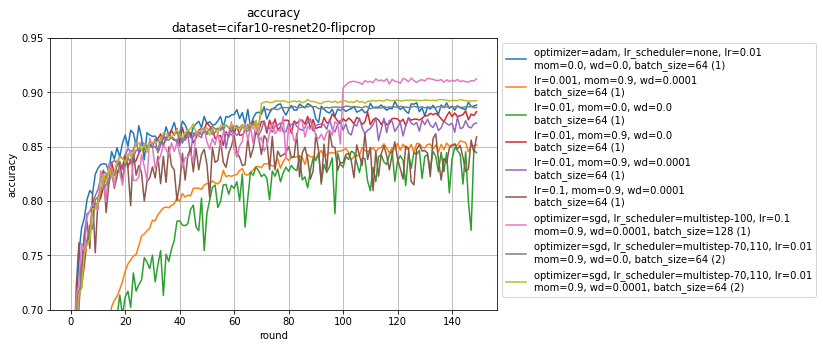

In [6]:
title_specs = {
    "dataset": "cifar10-resnet20-flipcrop",
}
series_specs = {
    "optimizer": '__all_incl_missing__',
    "lr_scheduler": '__all_incl_missing__',
    "learning_rate": '__all__',
    "momentum": '__all__',
    "weight_decay": '__all__',
    "batch_size": '__all__',
}

plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim((0.7, 0.95))
plt.grid(True)

The last line applies the settings from https://github.com/akamaster/pytorch_resnet_cifar10 and it does indeed reproduce that result.

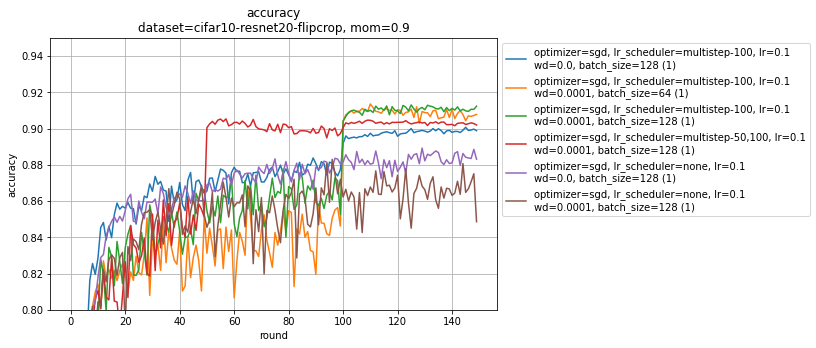

In [7]:
results_dir = [Path("results/20210819-simple-cnns/"), Path("results/20210819-simple-cnns-2/")]

title_specs = {
    "dataset": "cifar10-resnet20-flipcrop",
    "momentum": 0.9,
}
series_specs = {
    "optimizer": '__all_skip_missing__',
    "lr_scheduler": ['none', 'multistep-100', 'multistep-50,100', '__skip_missing__'],
    "learning_rate": '__all__',
    "weight_decay": '__all__',
    "batch_size": '__all__',
}

plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim((0.8, 0.95))
plt.grid(True)

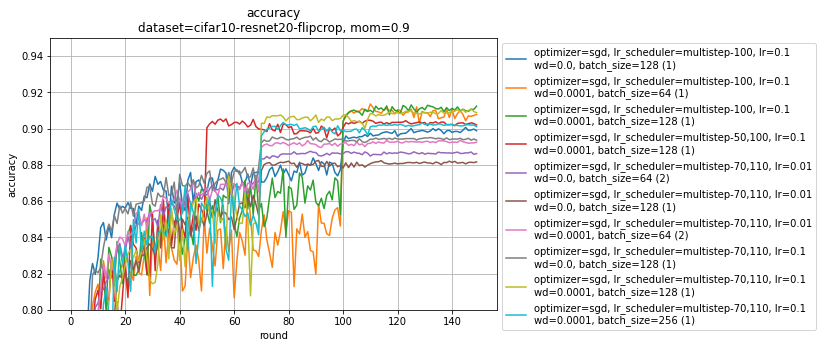

In [8]:
title_specs = {
    "dataset": "cifar10-resnet20-flipcrop",
    "momentum": 0.9,
}
series_specs = {
    "optimizer": '__all_skip_missing__',
    "lr_scheduler": ['multistep-70,110', 'multistep-100', 'multistep-50,100', '__skip_missing__'],
    "learning_rate": '__all__',
    "weight_decay": '__all__',
    "batch_size": '__all__',
}

plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim((0.8, 0.95))
plt.grid(True)

From this it does seem like that weight decay is important. Was it the batch size that did it?

# Fashion-MNIST

In [9]:
results_dir = Path("results/20210819-simple-cnns/")

fixed_specs = {
    "epochs": 150,
}

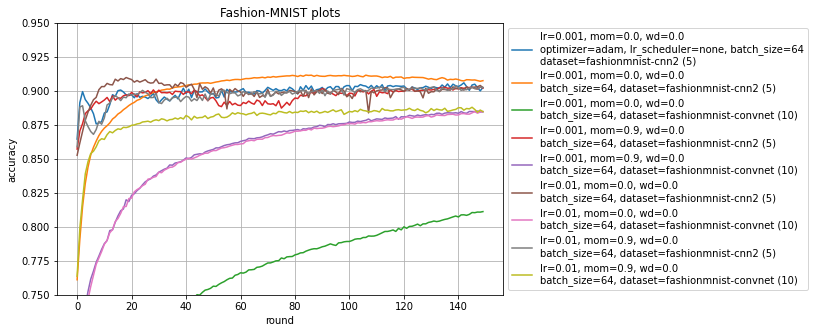

In [10]:
series_specs = {
    "learning_rate": '__all__',
    "momentum": '__all__',
    "weight_decay": '__all__',
    "optimizer": '__all_incl_missing__',
    "lr_scheduler": ['none', '__missing__'],
    "batch_size": '__all__',
    "dataset": [
        "fashionmnist-convnet",
        "fashionmnist-cnn1",
        "fashionmnist-cnn2",
    ]
}

plot_averaged_training_charts(results_dir, ['accuracy'], {}, fixed_specs, series_specs)
plt.title("Fashion-MNIST plots")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim((0.75, 0.95))
plt.grid(True)

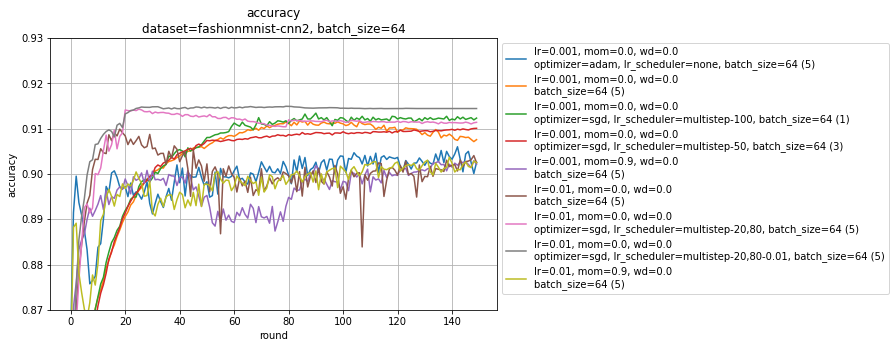

In [11]:
title_specs = {
    "dataset": "fashionmnist-cnn2",
    "batch_size": 64,
}
series_specs = {
    "learning_rate": '__all__',
    "momentum": '__all__',
    "weight_decay": '__all__',
    "optimizer": '__all_incl_missing__',
    "lr_scheduler": '__all_incl_missing__',
    "batch_size": '__all__',
}
plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim((0.87, 0.93))
plt.grid(True)

`cnn2` is definitely better. The optimizer parameters don't seem to matter too much. It's kind of noteworthy perhaps that the curves with `lr=0.01` do great at first, but seem to go downhill after the 20th epoch, even if the learning rate is stepped down by a factor of 10.

The one that does the best seems to be the one with the `multistep-20,80-0.01` scheduler. But that's mostly because it flattens out rather than go downwards like the `multistep-20,80` scheduler does, so it could just be that the `1e-6` learning rate that the former ends on is mostly doing nothing, or I suppose more precisely, preventing it from overfitting.

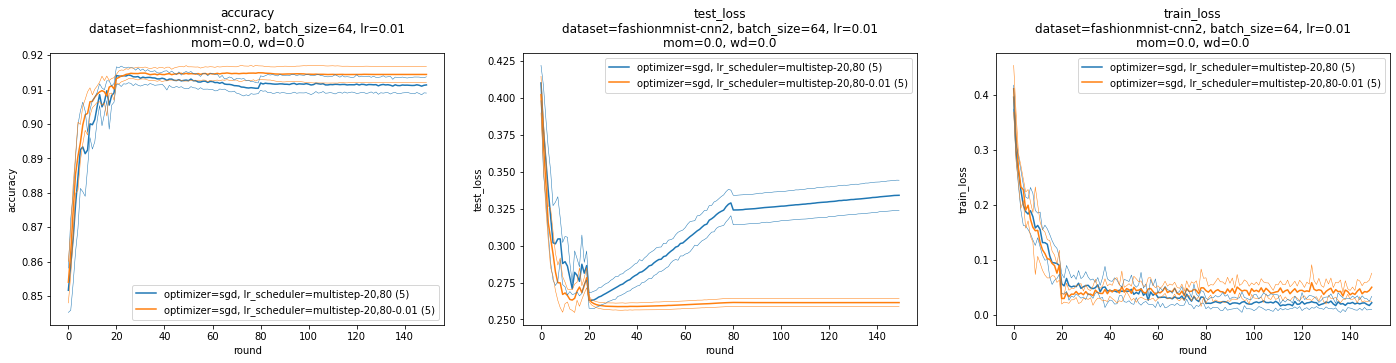

In [12]:
title_specs = {
    "dataset": "fashionmnist-cnn2",
    "batch_size": 64,
    "learning_rate": 0.01,
    "momentum": 0.0,
    "weight_decay": 0.0,
}
series_specs = {
    "optimizer": ["sgd", "__skip_missing__"],
    "lr_scheduler": ["multistep-20,80", "multistep-20,80-0.01", "__skip_missing__"],
}

plot_averaged_training_charts(results_dir, ['accuracy', 'test_loss', 'train_loss'], title_specs, fixed_specs, series_specs, plot_confints=True)

Seems like the `multistep-20,80` scheduler is indeed overfitting.